In [52]:
from facev21.face_detection import OpenCv, FaceDetector
import facev21
from facev21 import FaceRecognition as face
import glob 
import tensorflow as tf
import tensorflow.keras as keras
from facev21.extension import functions

list_img = glob.glob('facev21/dataset/*.jpg')
list_img_thien = glob.glob('facev21/images/thien/*.png')
list_img_thien

['facev21/images/thien\\thien14.png',
 'facev21/images/thien\\thien15.png',
 'facev21/images/thien\\thien16.png',
 'facev21/images/thien\\thien17.png',
 'facev21/images/thien\\thien18.png',
 'facev21/images/thien\\thien19.png',
 'facev21/images/thien\\thien20.png',
 'facev21/images/thien\\thien21.png',
 'facev21/images/thien\\thien22.png',
 'facev21/images/thien\\thien23.png',
 'facev21/images/thien\\thien24.png',
 'facev21/images/thien\\thien25.png']

In [46]:
model_path = glob.glob('facev21/pretrained/*.h5')
model_path

[]

In [50]:
distance = face.represent(img_path=list_img[1], normalization='base')
distance1 = face.represent(img_path=list_img[13], normalization='base')
import numpy as np


distance = np.array(distance)
distance1 = np.array(distance1)
np.sqrt(((distance - distance1)**2).sum())

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 761ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 553ms/step


0.7260043549133306

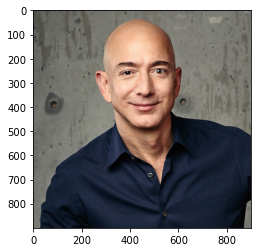

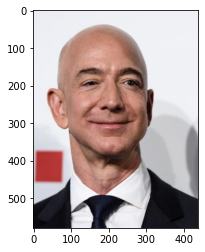

In [6]:
import matplotlib.pyplot as plt
import cv2
img1 = cv2.imread(list_img[12])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(list_img[13])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

In [7]:
import os
from pathlib import Path
import gdown

from facev21.extension import functions

import tensorflow as tf
tf_version = int(tf.__version__.split(".")[0])
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

def base_model():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))

	return model

def load_model(url = 'https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5'):

	model = base_model()

	#-----------------------------------

	home = functions.get_deepface_home()
	output = home+'/.facev21/weights/vgg_face.h5'

	if os.path.isfile(output) != True:
		print("vgg_face_weights.h5 will be downloaded...")
		gdown.download(url, output, quiet=False)

	#-----------------------------------
	
	model.load_weights(output)
	print(output)
	#-----------------------------------

	#TO-DO: why?
	vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

	return vgg_face_descriptor

In [8]:
model = base_model()
home = functions.get_deepface_home()
output = home+'/.facev21/weights/vgg_face.h5'
output

'C:\\Users\\ngoct/.facev21/weights/vgg_face.h5'

In [9]:
w = model.load_weights(output)
w

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_26 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_27 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                      

In [99]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
model_name = 'VGG19'
enforce_detection = True
detector_backend = 'opencv'
align = True
normalization = 'base'
img = functions.preprocess_face(img = list_img_thien[1]
		, target_size=(224, 224)
		, enforce_detection = enforce_detection
		, detector_backend = detector_backend
		, align = align)

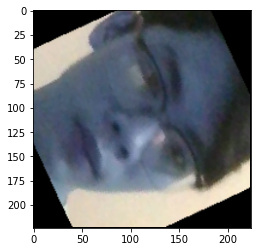

In [101]:
import matplotlib.pyplot as plt
plt.imshow(img[0])

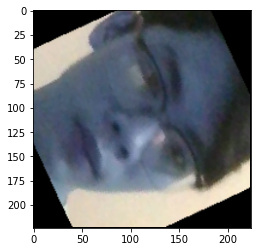

In [102]:
img = functions.normalize_input(img = img, normalization = 'base')
plt.imshow(img[0])

In [103]:
embedding = model.predict(img)
embedding.tolist()

1/1 [==============================] - 0s 268ms/step


[[0.009587069042026997,
  0.01844308152794838,
  0.015762681141495705,
  0.009695938788354397,
  0.021223846822977066,
  0.01041942648589611,
  0.014968915842473507,
  0.010638612322509289,
  0.022663457319140434,
  0.011895980685949326,
  0.0159250907599926,
  0.012449833564460278,
  0.011290781199932098,
  0.015004248358309269,
  0.02064415067434311,
  0.006657757796347141,
  0.022648805752396584,
  0.0071317576803267,
  0.011649712920188904,
  0.013145243749022484,
  0.014393668621778488,
  0.013913076370954514,
  0.013975097797811031,
  0.009986253455281258,
  0.022802308201789856,
  0.018205871805548668,
  0.012350281700491905,
  0.023210128769278526,
  0.016787253320217133,
  0.012773114256560802,
  0.024532832205295563,
  0.023507114499807358,
  0.017983732745051384,
  0.008502590470016003,
  0.01014870498329401,
  0.018052080646157265,
  0.013004230335354805,
  0.009892488829791546,
  0.015301268547773361,
  0.019887864589691162,
  0.009822416119277477,
  0.015326818451285362,


In [15]:
import sqlite3
from datetime import timedelta


In [16]:
con = sqlite3.connect('facev21/db/face.db')
cur = con.cursor()

In [17]:
names = ['April Reiter',
'Emory Miller',
'David Ballin',
'Alice Trotter',
'Virginia Rios',
'Thomas Wheeler',
'James Harrell',
'Nicolas White',
'Mary Flanagan',
'Velda Grubb']

In [19]:
for i in range(10):
    cur.execute("INSERT INTO User(UId, FirstName) VALUES ({}, '{}')".format(i, names[i]))
    
con.commit()

In [22]:
import pandas as pd
user = pd.read_sql('SELECT * FROM User', con)
user

,UId,FirstName,LastName,Type
0,0,April Reiter,None,None
1,1,Emory Miller,None,None
2,2,David Ballin,None,None
3,3,Alice Trotter,None,None
4,4,Virginia Rios,None,None
5,5,Thomas Wheeler,None,None
6,6,James Harrell,None,None
7,7,Nicolas White,None,None
8,8,Mary Flanagan,None,None
9,9,Velda Grubb,None,None


In [23]:
index = 1
data = []
for image in list_img[31:40]:
    distance1 = face.represent(img_path=image, normalization='base')
    data.append(distance1)


C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 738ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 652ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 630ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 811ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 702ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 0s 462ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 0s 393ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 0s 460ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 597ms/step


In [31]:
user['UId'] = user['UId'].astype('int')
user['UId'].values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
index = 0
for image in data:
    
    cur.execute('''
            INSERT INTO UserExtend(UId, FaceExtract, EyeRight, EyeLeft) VALUES ({}, '{}', '{}', '{}')
        '''.format(user['UId'].values[index], image, '', ''))
    index += 1
con.commit()


In [93]:
model = face.build_model('VGG19')
model

C:\Users\ngoct/.facev21/weights/vgg_face.h5


In [127]:
distance1 = np.array(face.represent(img_path=list_img_thien[1], normalization='base', model=model, detector_backend = 'opencv'))
distance2 = np.array(face.represent(img_path=list_img_thien[0], normalization='base', model=model, detector_backend = 'opencv'))

print(np.sqrt(((distance1 - distance2)**2).sum()))

1/1 [==============================] - 0s 176ms/step
0.58027297172093


In [53]:
con.execute("DELETE FROM UserExtend")
con.commit()

In [55]:
import pandas as pd
df = pd.read_sql('SELECT * FROM UserExtend', con)
df

,UId,FaceExtract,EyeRight,EyeLeft
0,0,"[0.008346730843186378, 0.0028773825615644455, ...",,
1,1,"[0.0160292349755764, 0.009221029467880726, 0.0...",,
2,2,"[0.014190701767802238, -0.012705053202807903, ...",,
3,3,"[0.012199217453598976, -0.009871146641671658, ...",,
4,4,"[0.014921887777745724, 0.00021167489467188716,...",,
5,5,"[0.0021601738408207893, -0.013572107069194317,...",,
6,6,"[-0.006733804941177368, -0.01104873139411211, ...",,
7,7,"[-0.002239312743768096, -0.007606220431625843,...",,
8,8,"[-0.007748617324978113, -0.007240379694849253,...",,


In [87]:
distance1 = face.represent(img_path=list_img[15], normalization='base')

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 702ms/step


In [120]:

for data in  df['FaceExtract']:
    data = data.replace('[', '')
    data = data.replace(']', '')
    data = np.array(data.split(','), dtype='float64')
    print(np.sqrt(((distance1 - data)**2).sum()))

0.47481515660395174
0.45203050278065243
0.6812722731633074
0.4691561157677098
0.5068870182000103
0.6235008192626175
0.7054982483312836
0.5736242047843785
0.6629596578290503


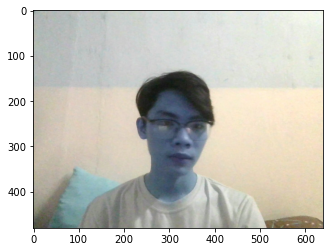

In [106]:
img = cv2.imread(list_img_thien[1])
plt.imshow(img)

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from functools import partial
myConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)
myDense = partial(keras.layers.Dense, activation='relu', kernel_initializer="he_normal")
class ResnetUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwagrs):
        super().__init__(**kwagrs)
        self.activation = keras.activations.get(activation)
        self.filters = filters
        self.strides = strides
 
        self.main_layer = [
            myConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            myConv2D(filters),
            keras.layers.BatchNormalization(),
        ]

        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                myConv2D(filters, kernel_size = 1, strides=strides),
                keras.layers.BatchNormalization()
            ]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layer:
            Z = layer(Z)
        
        skip_Z = inputs 
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "activation": self.activation,
            "strides": self.strides,
            "filters": self.filters
        })
        return config
            

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3],
                              padding='same', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same'))
prev_filter = 64
for filter in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filter == prev_filter else 2
    model.add(ResnetUnit(filter, strides=strides))
    prev_filter = filter

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))



In [7]:
model_name = 'VGG19'
enforce_detection = True
detector_backend = 'opencv'
align = True
normalization = 'base'
img = functions.preprocess_face(img = list_img_thien[1]
		, target_size=(224, 224)
		, enforce_detection = enforce_detection
		, detector_backend = detector_backend
		, align = align)

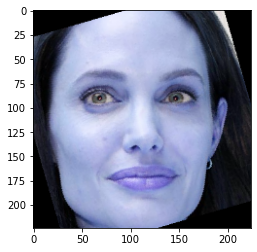

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img2[0])

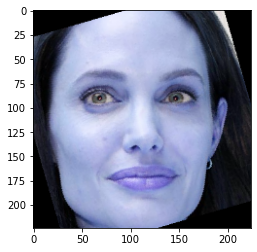

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 527ms/step
C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 841ms/step


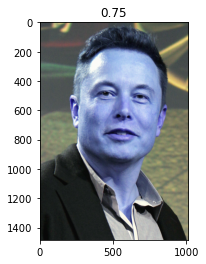

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 670ms/step


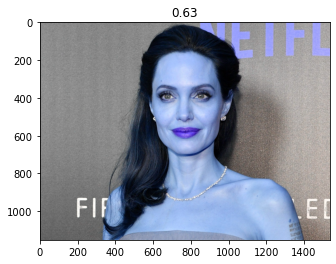

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 604ms/step


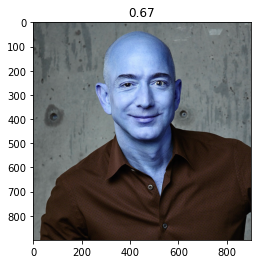

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 585ms/step


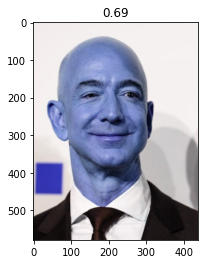

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 663ms/step


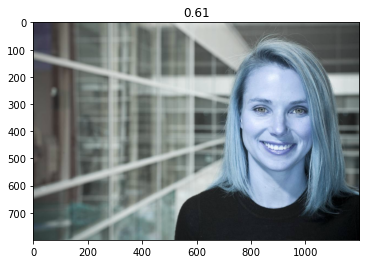

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 717ms/step


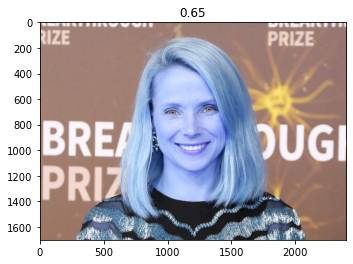

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 598ms/step


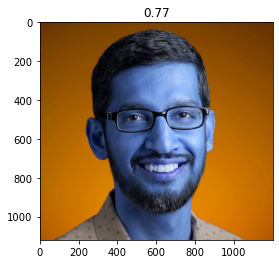

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 571ms/step


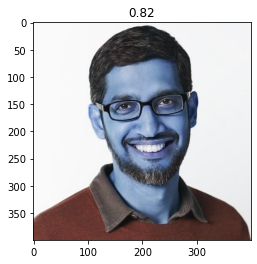

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 584ms/step


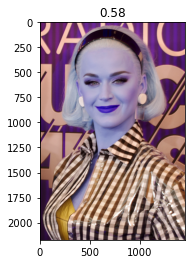

C:\Users\ngoct/.facev21/weights/vgg_face.h5
1/1 [==============================] - 1s 680ms/step


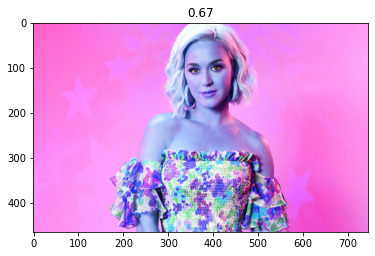

In [57]:
import numpy as np
import cv2
img = functions.preprocess_face(img = list_img[2]
		, target_size=(224, 224)
		, enforce_detection = enforce_detection
		, detector_backend = detector_backend
		, align = align)
plt.imshow(img[0])
plt.show()
d1 = np.array(face.represent(img_path=list_img[2], normalization='base', detector_backend = 'mediapipe'))

for i in range(10, 20):
	d2 = np.array(face.represent(img_path=list_img[i], normalization='base', detector_backend = 'mediapipe'))
	eculid = np.sqrt(((d1 - d2)**2).sum())
	img = cv2.imread(list_img[i])
	plt.imshow(img)
	plt.title(eculid.round(2))
	plt.show()


1/1 [==============================] - 0s 113ms/step


0.47747252392582595